In [31]:
# Importing Modules needed
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

In [2]:
# Importing the data into the data fram
df = pd.read_csv('PMAppDummydata.csv')
df.head()


,name,teamSize,budget,workload,importance,completionTime
0,Strategic Alliance Book,14,742000,manageable,1,60
1,Budget Video Script,17,72000,heavy,5,45
2,Budget blog,21,889000,light,6,80
3,Email Correspondence to schedule Connie Videos,21,488000,heavy,1,70
4,Council Budget Schedule News Release,23,653000,manageable,6,10


In [9]:
# taking our x variable out of our data frame
X = df[['teamSize','budget','workload','importance']]
X.head()

,teamSize,budget,workload,importance
0,14,742000,manageable,1
1,17,72000,heavy,5
2,21,889000,light,6
3,21,488000,heavy,1
4,23,653000,manageable,6


In [4]:
# taking y variables out of the data fram
Y = df[['completionTime']]
Y.head()

,completionTime
0,60
1,45
2,80
3,70
4,10


In [11]:
# transalting any categorical values using get dummies
X = pd.get_dummies(data=X)
X.head()


,teamSize,budget,importance,workload_heavy,workload_light,workload_manageable
0,14,742000,1,0,0,1
1,17,72000,5,1,0,0
2,21,889000,6,0,1,0
3,21,488000,1,1,0,0
4,23,653000,6,0,0,1


In [12]:
# SPlitting into our training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# print the intercept
print(model.intercept_)


[51.53259668]


In [22]:
# print the coefficients of each parameter
coeff_parameter = pd.DataFrame(model.coef_.T,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
teamSize,0.129854
budget,-0.000002
importance,0.012800
workload_heavy,-1.754767
workload_light,0.972588
workload_manageable,0.782178


In [24]:
# getting the prediction from our test set
predictions = model.predict(X_test)
predictions[0:10]

array([[52.29832043],
       [51.46474327],
       [52.08015677],
       [50.9611626 ],
       [53.14659813],
       [53.89115081],
       [54.76757901],
       [54.44624588],
       [51.60235632],
       [54.52024386]])

<AxesSubplot:xlabel='completionTime'>

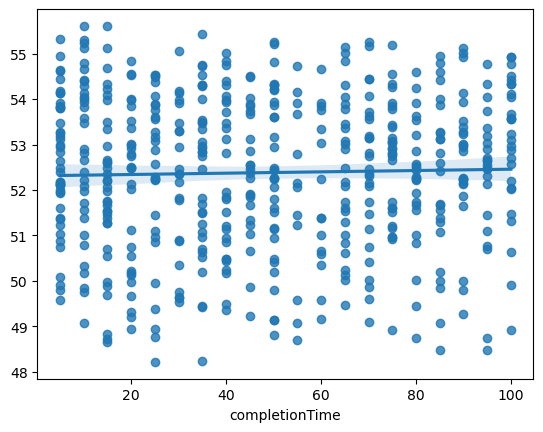

In [28]:
# Creates a plot representing our predictions with the actual values
sns.regplot(x=y_test,y=predictions)

In [32]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:         completionTime   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.054
Date:                Fri, 14 Jul 2023   Prob (F-statistic):              0.384
Time:                        15:10:55   Log-Likelihood:                -7753.7
No. Observations:                1620   AIC:                         1.552e+04
Df Residuals:                    1614   BIC:                         1.555e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  38.6494    